# Case Study - Leads Scoring

##### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


##### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [3]:
#importing dataset from csv file

leads_ds=pd.read_csv("C:\\DataScience\\LeadScoringCaseStudy\\Lead Scoring Assignment\\Leads.csv")
leads_ds.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_ds.shape

(9240, 37)

In [5]:
leads_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads_ds.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### EXPLORATORY DATA ANALYSIS
### Data understanding, preparation

In [7]:
#check for duplicates in Prospect Id and Lead Nummber

sum(leads_ds.duplicated(subset = 'Prospect ID')) == 0
sum(leads_ds.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values found in Prospect ID & Lead Number

Prospect ID & Lead Number are two variables that are just indicative of the ID number of the approched People so can be dropped.

In [8]:
#dropping Lead Number and Prospect ID since they have no duplicates

leads_ds.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
#Convert 'Select' values to NaN.

leads_ds = leads_ds.replace('Select', np.nan)

In [10]:
#checking for null values in each rows

leads_ds.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#Lets check percentage of null values in each column

round(100*(leads_ds.isnull().sum()/len(leads_ds.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#drop cols with more than 45% missing values

cols=leads_ds.columns

for i in cols:
    if((100*(leads_ds[i].isnull().sum()/len(leads_ds.index))) >= 45):
        leads_ds.drop(i, 1, inplace = True)

In [13]:
#checking null values percentage again

round(100*(leads_ds.isnull().sum()/len(leads_ds.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

##### Categorical Attributes Analysis:

In [14]:
#Lets check value counts of Country column

leads_ds['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

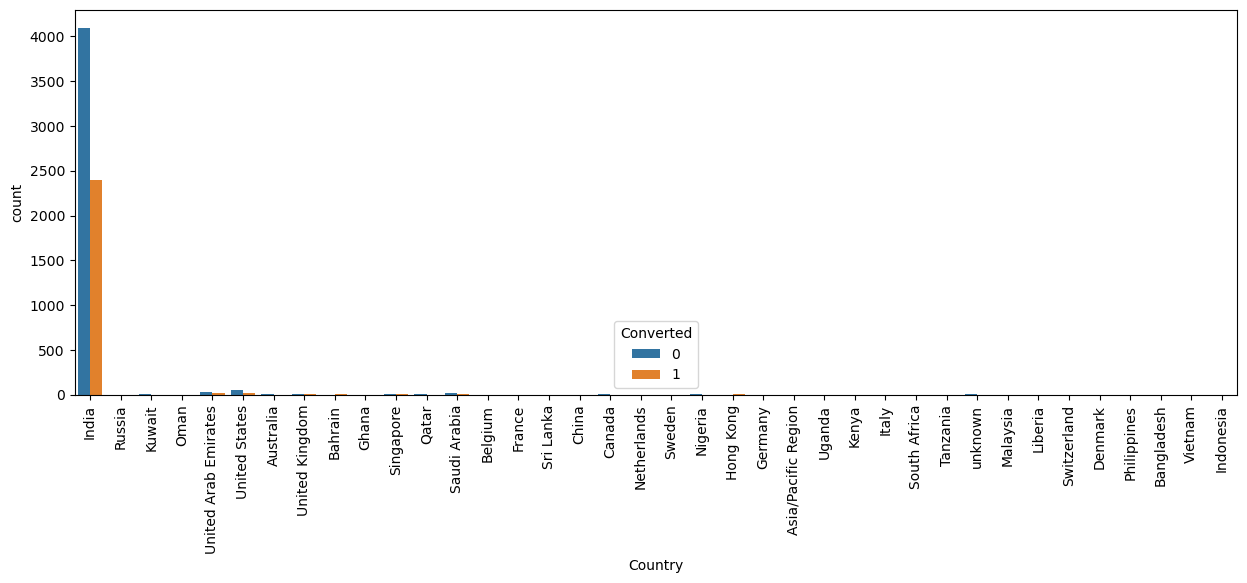

In [15]:
#plotting spread for Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_ds.Country, hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (about 97% of the Data), this column can be dropped

In [16]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [17]:
#checking value counts of City column

leads_ds['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
leads_ds['City'] = leads_ds['City'].replace(np.nan,'Mumbai')

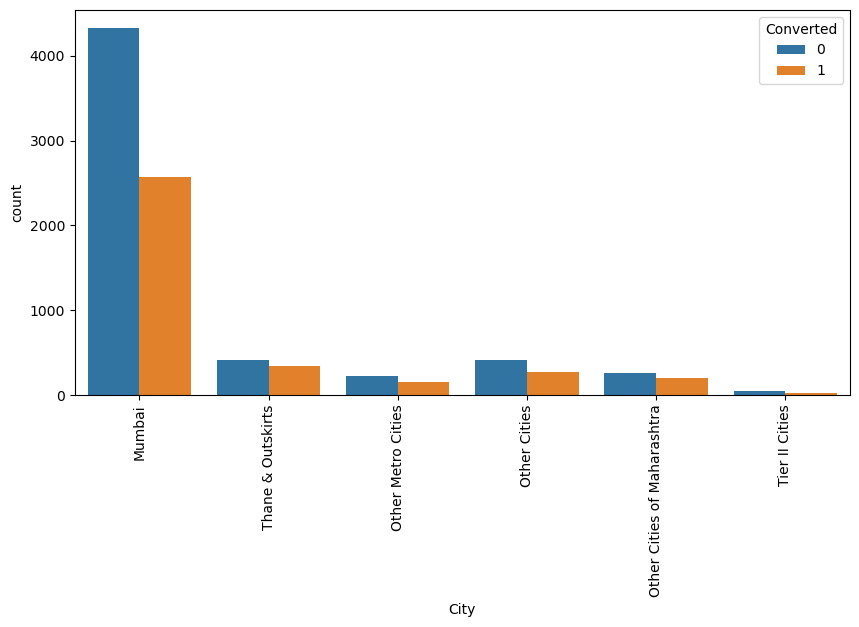

In [19]:
# plot spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads_ds.City, hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [20]:
#check value counts of Specialization column

leads_ds['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# So we will replace NaN values here with 'Not Specified'

leads_ds['Specialization'] = leads_ds['Specialization'].replace(np.nan, 'Not Specified')

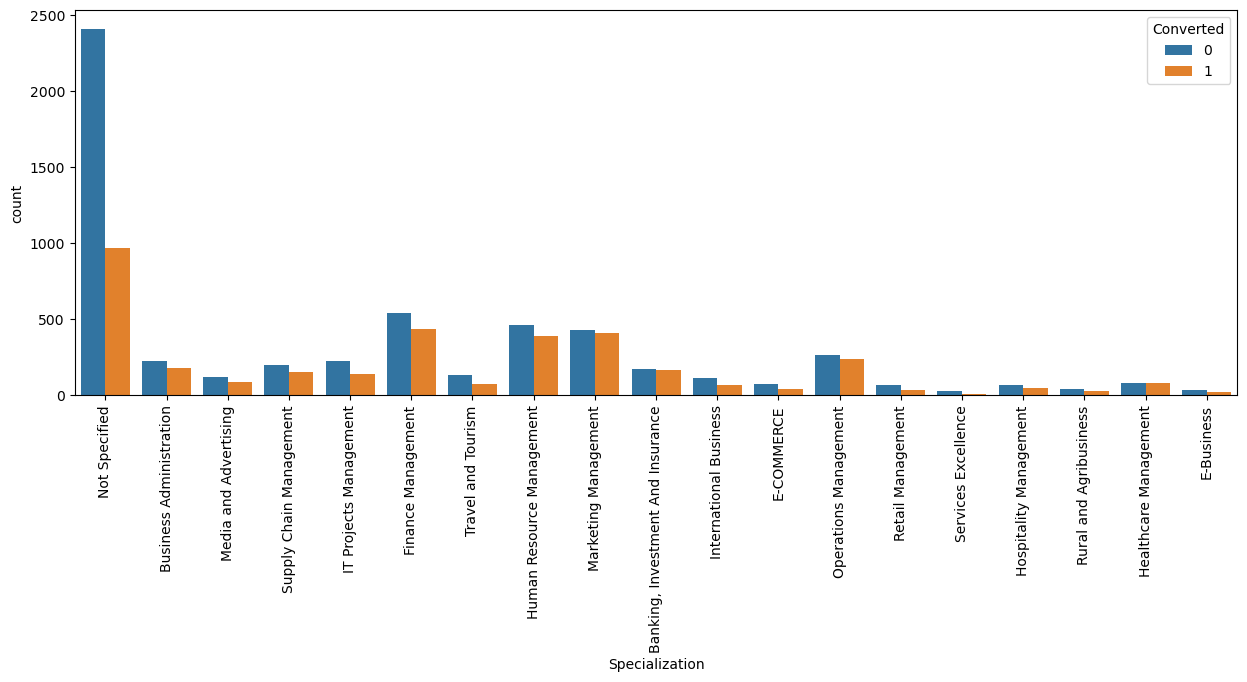

In [22]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads_ds.Specialization, hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Specialization with "Management" in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [23]:
#Concat Management Specializations because they show similar trends

leads_ds['Specialization'] = leads_ds['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

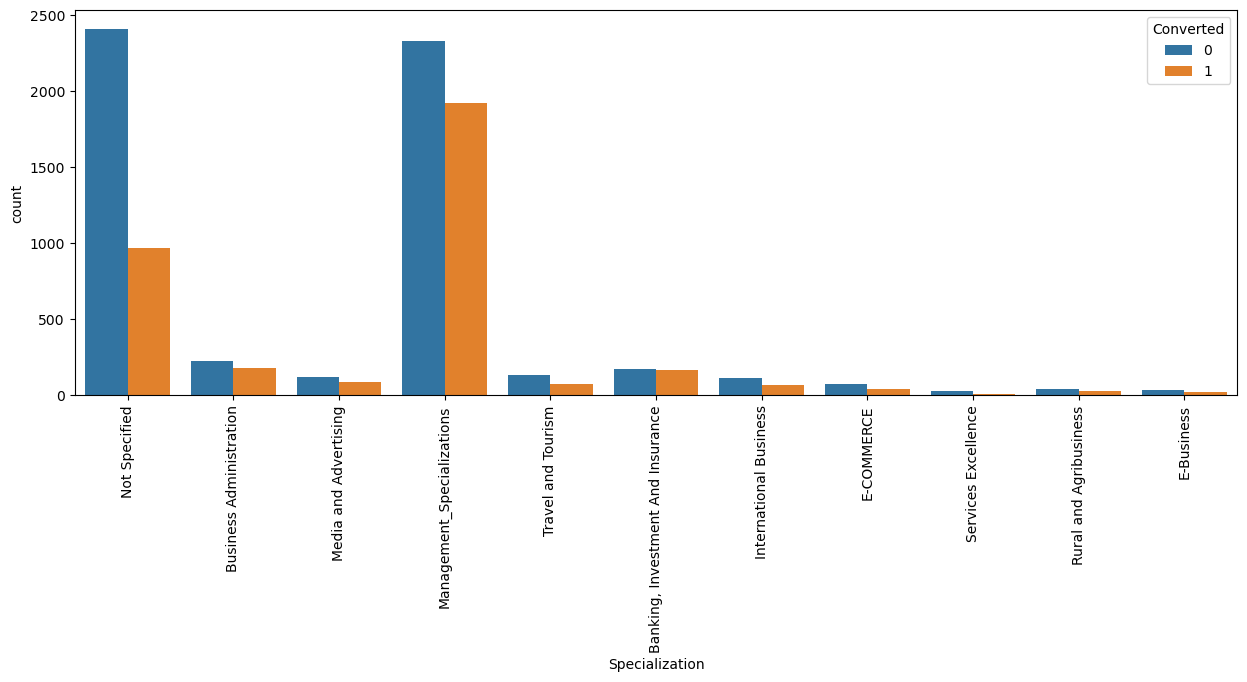

In [24]:
#Graph count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(leads_ds.Specialization, hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [25]:
#What is your current occupation

leads_ds['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
#imputing Nan values with mode "Unemployed"

leads_ds['What is your current occupation'] = leads_ds['What is your current occupation'].replace(np.nan, 'Unemployed')

In [27]:
#checking count of values
leads_ds['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

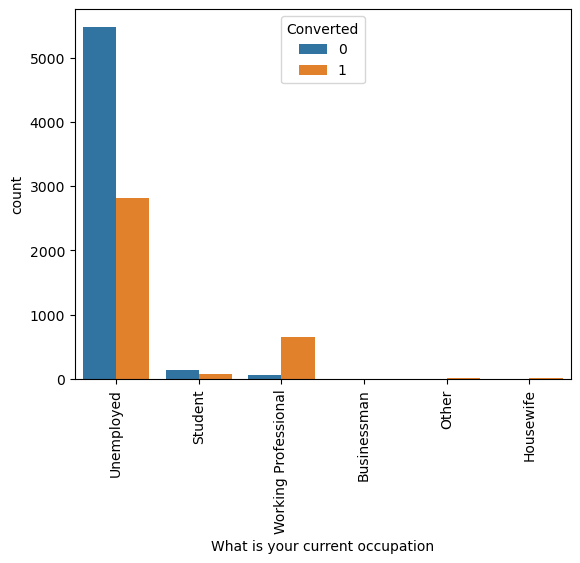

In [28]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads_ds['What is your current occupation'], hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in terms of Absolute numbers.

In [29]:
#checking value counts

leads_ds['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
#replacing Nan values with Mode "Better Career Prospects"

leads_ds['What matters most to you in choosing a course'] = leads_ds['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

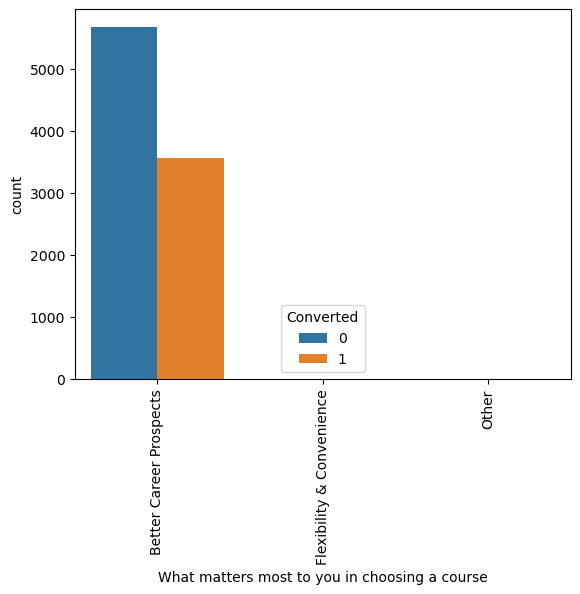

In [32]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads_ds['What matters most to you in choosing a course'], hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
#checking value counts of variable
leads_ds['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [35]:
#checking value counts of Tag variable
leads_ds['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [36]:
#replacing Nan values with "Not Specified"
leads_ds['Tags'] = leads_ds['Tags'].replace(np.nan,'Not Specified')

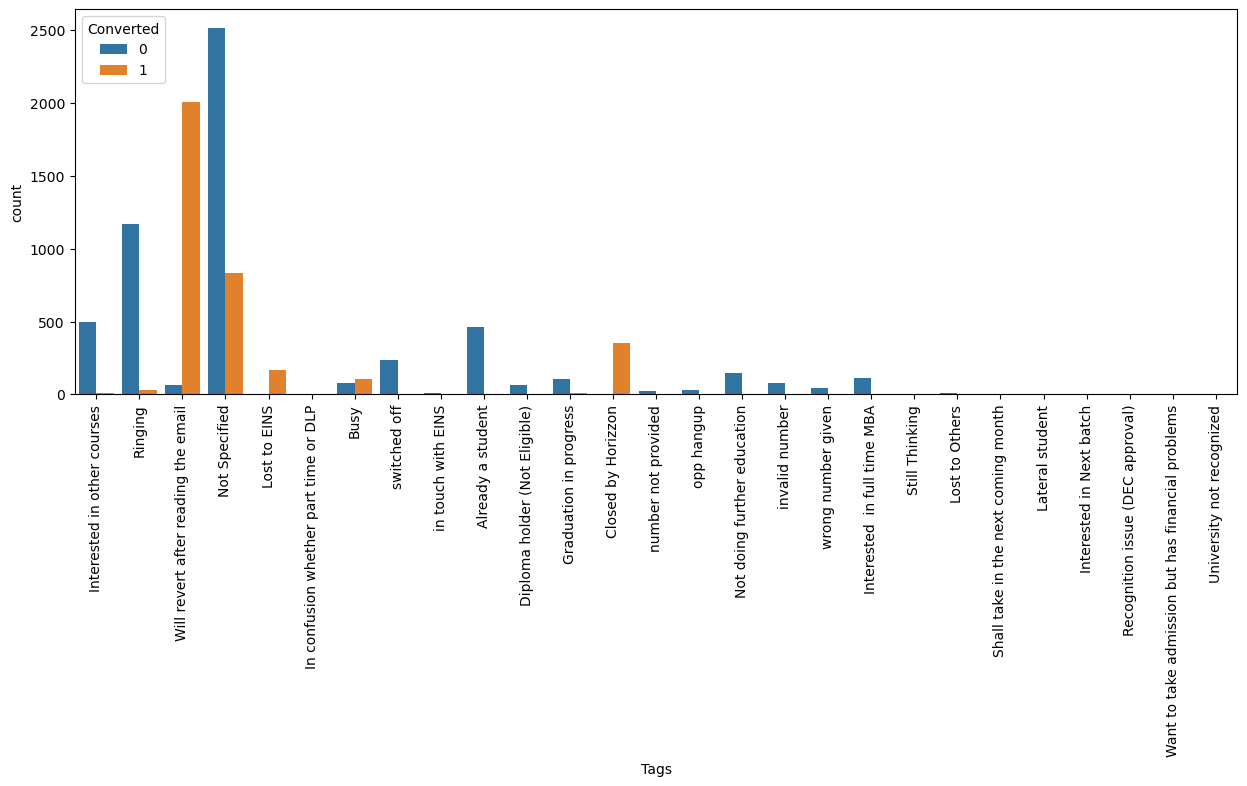

In [37]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads_ds['Tags'], hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
#replacing tags with low frequency with "Other Tags"
leads_ds['Tags'] = leads_ds['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_ds['Tags'] = leads_ds['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [39]:
#checking percentage of missing values
round(100*(leads_ds.isnull().sum()/len(leads_ds.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [40]:
#checking value counts of Lead Source column

leads_ds['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [41]:
#replacing Nan Values and combining low frequency values
leads_ds['Lead Source'] = leads_ds['Lead Source'].replace(np.nan,'Others')
leads_ds['Lead Source'] = leads_ds['Lead Source'].replace('google','Google')
leads_ds['Lead Source'] = leads_ds['Lead Source'].replace('Facebook','Social Media')
leads_ds['Lead Source'] = leads_ds['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

We can group some of the lower frequency occuring labels under a common label 'Others'

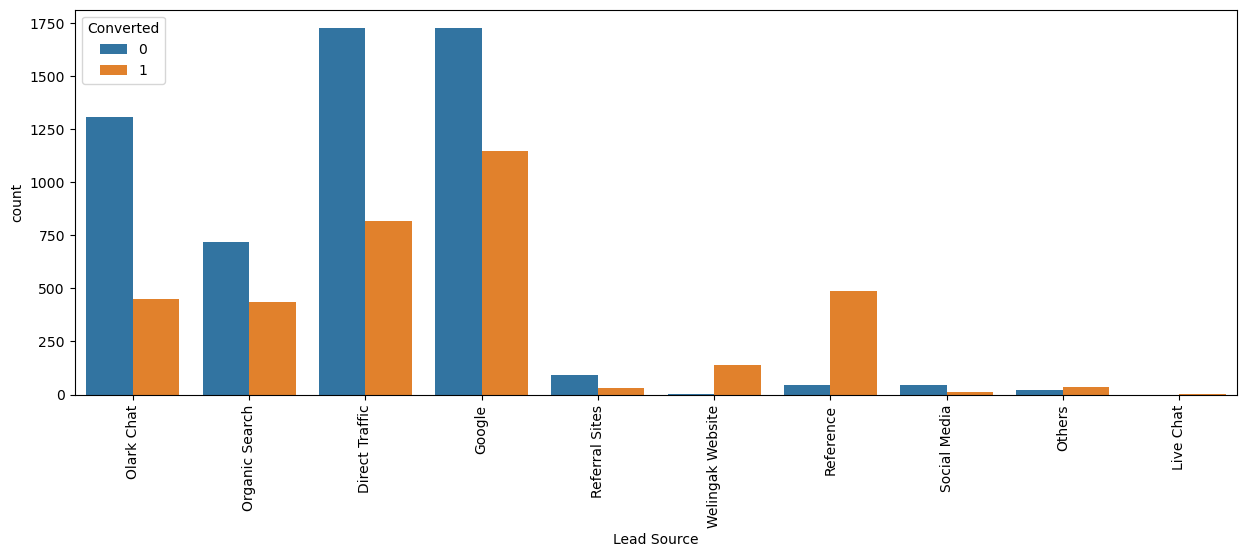

In [42]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_ds['Lead Source'], hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high.
3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [43]:
# Last Activity:

leads_ds['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [44]:
#replacing Nan Values and combining low frequency values

leads_ds['Last Activity'] = leads_ds['Last Activity'].replace(np.nan,'Others')
leads_ds['Last Activity'] = leads_ds['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [45]:
# Last Activity:

leads_ds['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [46]:
#Check the Null Values in All Columns:
round(100*(leads_ds.isnull().sum()/len(leads_ds.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [47]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads_ds = leads_ds.dropna()

In [48]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_ds.isnull().sum()/len(leads_ds.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [49]:
#Lead Origin
leads_ds['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64

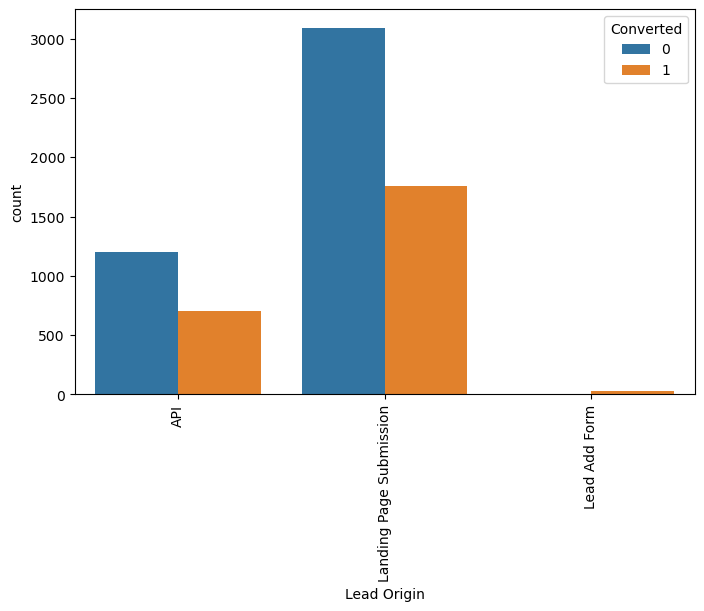

In [50]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads_ds['Lead Origin'], hue=leads_ds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference

1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

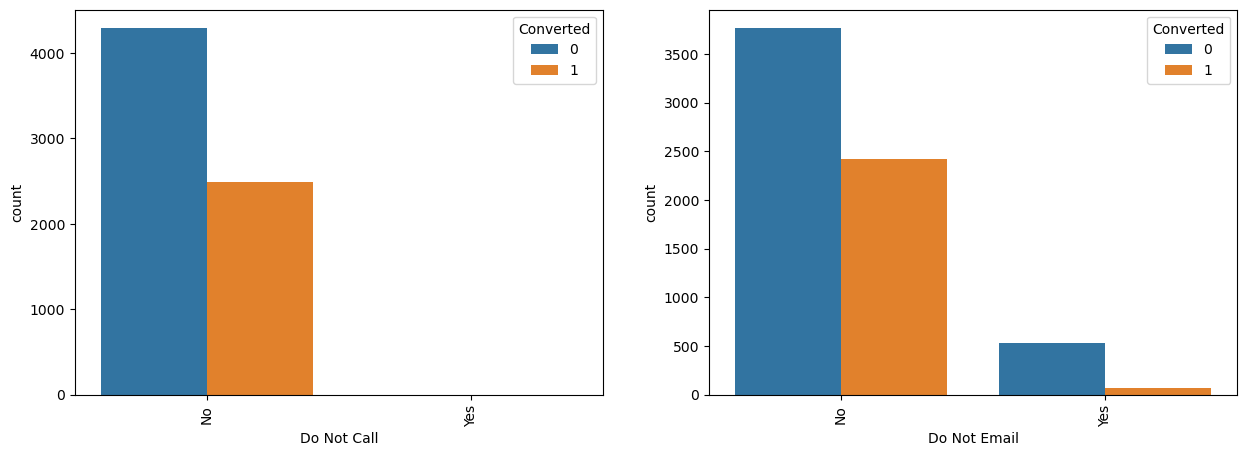

In [51]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads_ds['Do Not Call'], hue=leads_ds.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads_ds['Do Not Email'], hue=leads_ds.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [52]:
#checking value counts for Do Not Call
leads_ds['Do Not Call'].value_counts(dropna=False)

No     6778
Yes       1
Name: Do Not Call, dtype: int64

In [53]:
#checking value counts for Do Not Email
leads_ds['Do Not Email'].value_counts(dropna=False)

No     6186
Yes     593
Name: Do Not Email, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [54]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

IMBALANCED VARIABLES THAT CAN BE DROPPED

In [55]:
leads_ds.Search.value_counts(dropna=False)

No     6765
Yes      14
Name: Search, dtype: int64

In [56]:
leads_ds.Magazine.value_counts(dropna=False)

No    6779
Name: Magazine, dtype: int64

In [57]:
leads_ds['Newspaper Article'].value_counts(dropna=False)

No     6777
Yes       2
Name: Newspaper Article, dtype: int64

In [58]:
leads_ds['X Education Forums'].value_counts(dropna=False)

No     6778
Yes       1
Name: X Education Forums, dtype: int64

In [59]:
leads_ds['Newspaper'].value_counts(dropna=False)

No     6778
Yes       1
Name: Newspaper, dtype: int64

In [60]:
leads_ds['Digital Advertisement'].value_counts(dropna=False)

No     6775
Yes       4
Name: Digital Advertisement, dtype: int64

In [61]:
leads_ds['Through Recommendations'].value_counts(dropna=False)

No     6772
Yes       7
Name: Through Recommendations, dtype: int64

In [62]:
leads_ds['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6779
Name: Receive More Updates About Our Courses, dtype: int64

In [63]:
leads_ds['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6779
Name: Update me on Supply Chain Content, dtype: int64

In [64]:
leads_ds['Get updates on DM Content'].value_counts(dropna=False)

No    6779
Name: Get updates on DM Content, dtype: int64

In [65]:
leads_ds['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6779
Name: I agree to pay the amount through cheque, dtype: int64

In [66]:
leads_ds['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     3913
Yes    2866
Name: A free copy of Mastering The Interview, dtype: int64

In [67]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [68]:
#checking value counts of last Notable Activity
leads_ds['Last Notable Activity'].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [69]:
#clubbing lower frequency values

leads_ds['Last Notable Activity'] = leads_ds['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

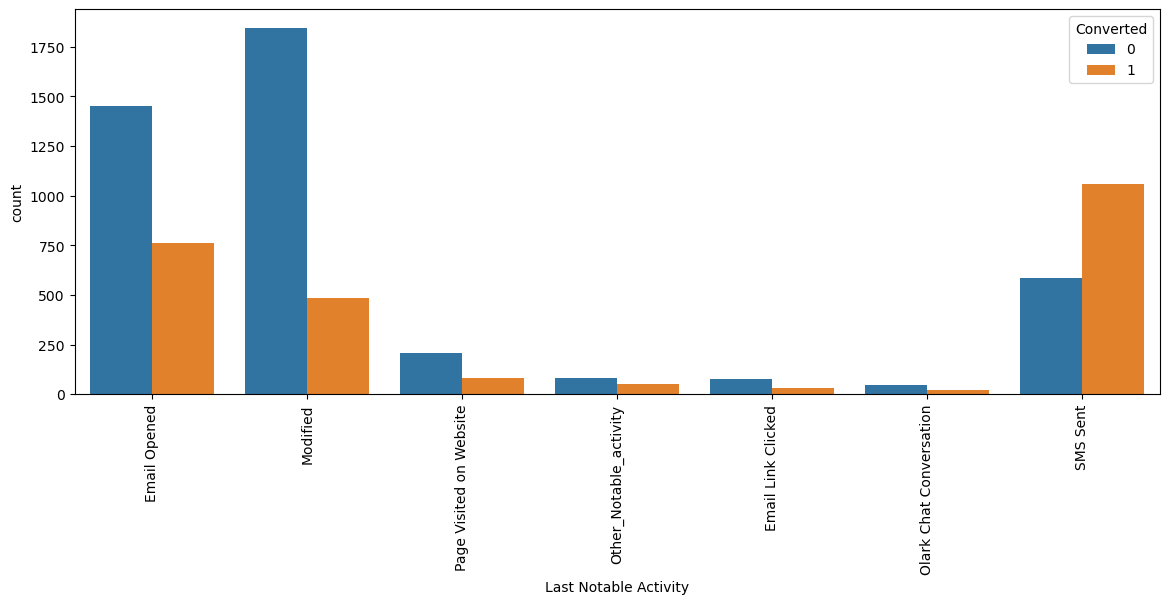

In [70]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_ds)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [71]:
#checking value counts for variable

leads_ds['Last Notable Activity'].value_counts()

Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Other_Notable_activity      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: Last Notable Activity, dtype: int64

In [72]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [73]:
#dropping columns
leads_ds = leads_ds.drop(cols_to_drop,1)
leads_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

##### Numerical Attributes Analysis:

In [74]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads_ds['Converted'])/len(leads_ds['Converted'].index))*100
Converted

36.65732408909869

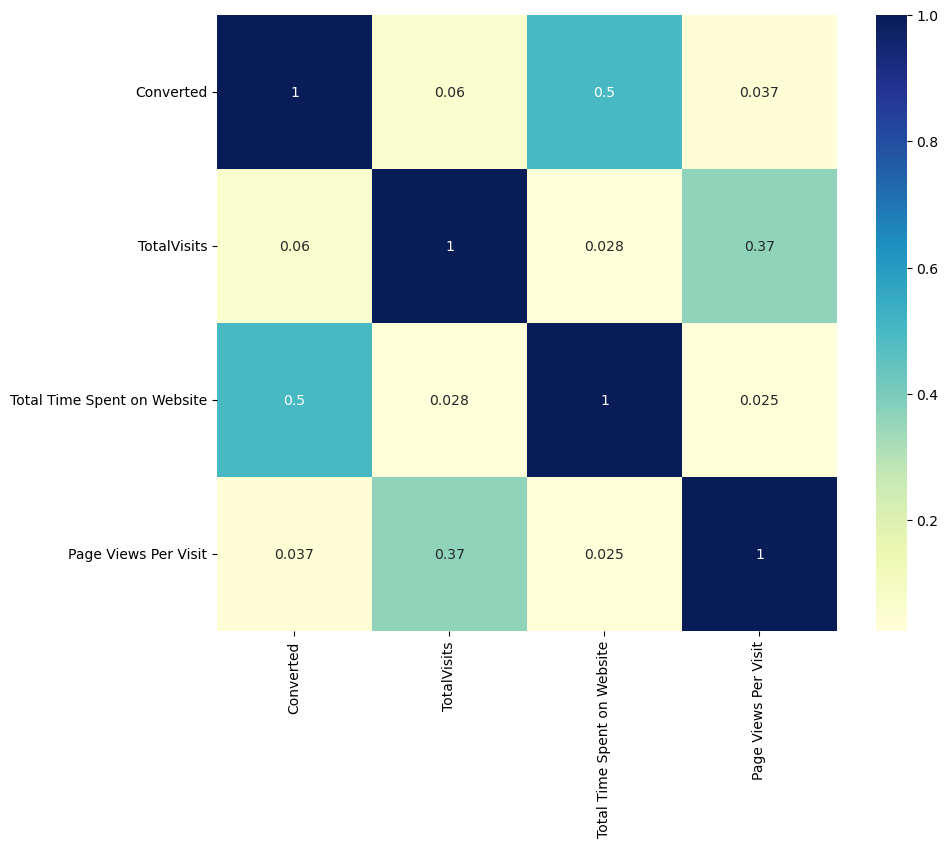

In [75]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_ds.corr(), cmap="YlGnBu", annot=True)
plt.show()

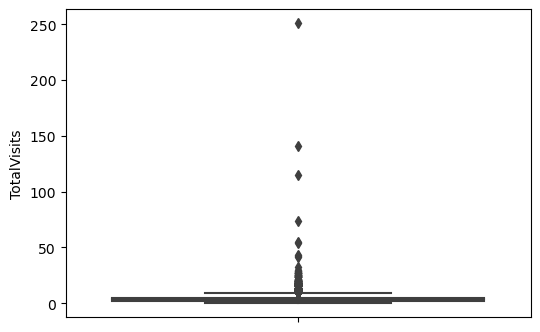

In [76]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_ds['TotalVisits'])
plt.show()

We can see presence of outliers here

In [77]:
#checking percentile values for "Total Visits"

leads_ds['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

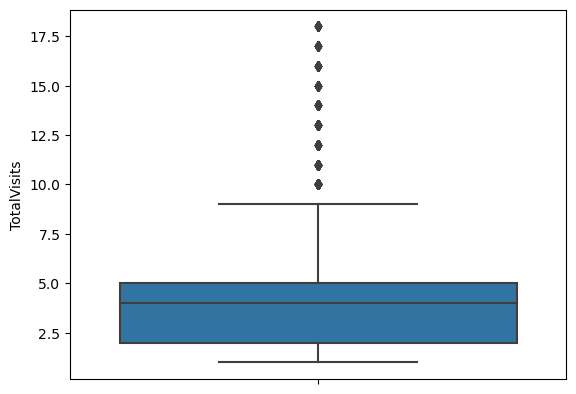

In [78]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads_ds.TotalVisits.quantile(0.99)
leads_ds = leads_ds[(leads_ds.TotalVisits <= Q3)]
Q1 = leads_ds.TotalVisits.quantile(0.01)
leads_ds = leads_ds[(leads_ds.TotalVisits >= Q1)]
sns.boxplot(y=leads_ds['TotalVisits'])
plt.show()

In [79]:
leads_ds.shape

(6706, 14)

Check for the Next Numerical Column:

In [80]:
#checking percentiles for "Total Time Spent on Website"

leads_ds['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6706.000000
mean      631.736206
std       541.763382
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1104.000000
90%      1451.500000
95%      1606.000000
99%      1862.950000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

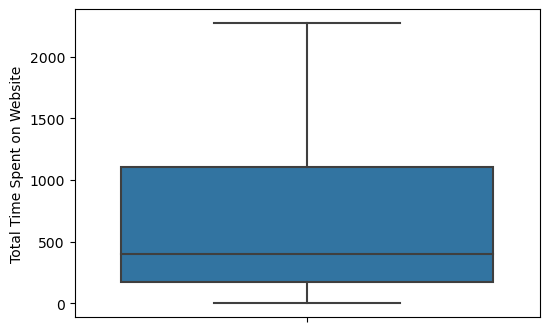

In [81]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_ds['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

Check for Page Views Per Visit:

In [82]:
#checking spread of "Page Views Per Visit"

leads_ds['Page Views Per Visit'].describe()

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

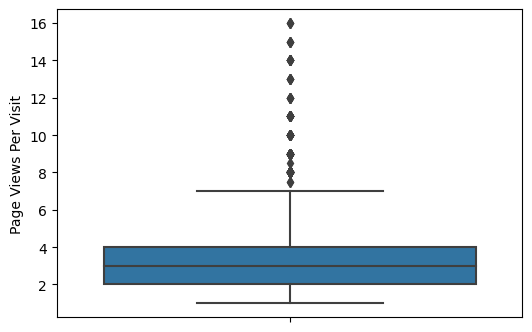

In [83]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_ds['Page Views Per Visit'])
plt.show()

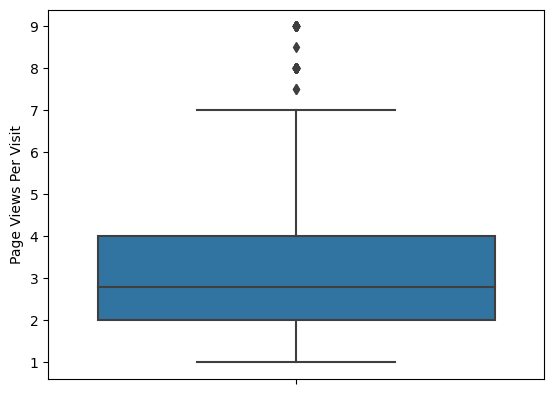

In [84]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads_ds['Page Views Per Visit'].quantile(0.99)
leads_ds = leads_ds[leads_ds['Page Views Per Visit'] <= Q3]
Q1 = leads_ds['Page Views Per Visit'].quantile(0.01)
leads_ds = leads_ds[leads_ds['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads_ds['Page Views Per Visit'])
plt.show()

In [85]:
leads_ds.shape

(6640, 14)

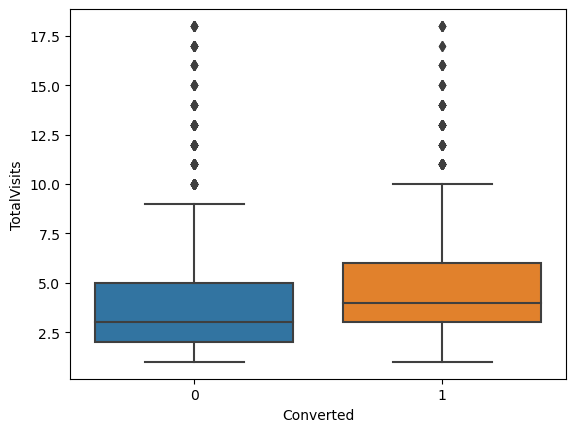

In [86]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_ds)
plt.show()

Inference

1. Median for converted and not converted leads are the close.
2. Nothng conclusive can be said on the basis of Total Visits


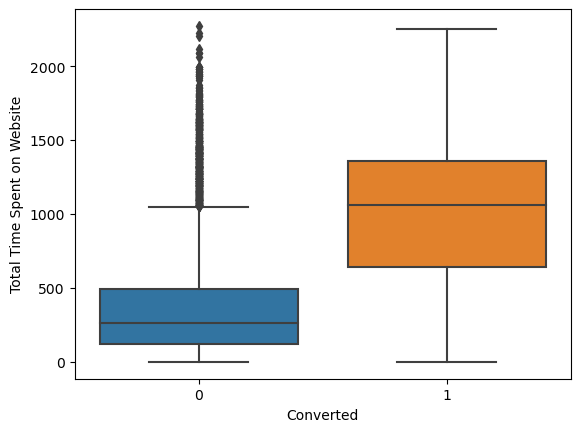

In [87]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads_ds.Converted, y=leads_ds['Total Time Spent on Website'])
plt.show()

Inference

1. Leads spending more time on the website are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.

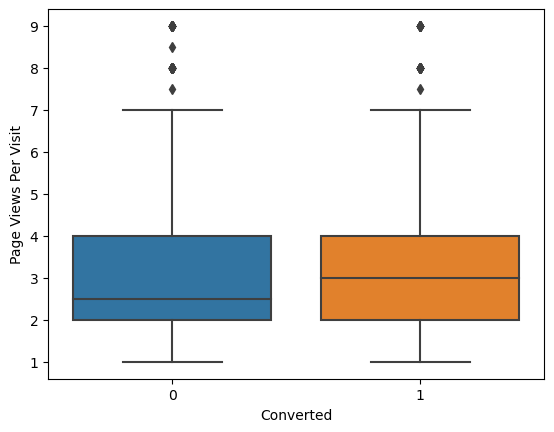

In [88]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads_ds.Converted,y=leads_ds['Page Views Per Visit'])
plt.show()

Inference

1. Median for converted and unconverted leads is the same.
2. Nothing can be said specifically for lead conversion from Page Views Per Visit

In [89]:
#checking missing values in leftover columns/

round(100*(leads_ds.isnull().sum()/len(leads_ds.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

##### Dummy Variable Creation:

In [90]:
#getting a list of categorical columns

cat_cols= leads_ds.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [91]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_ds[varlist] = leads_ds[varlist].apply(binary_map)

In [92]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads_ds[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads_ds = pd.concat([leads_ds,dummy],1)

In [93]:
dummy = pd.get_dummies(leads_ds['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads_ds = pd.concat([leads_ds, dummy], axis = 1)

In [94]:
dummy = pd.get_dummies(leads_ds['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_ds = pd.concat([leads_ds, dummy], axis = 1)

In [95]:
dummy = pd.get_dummies(leads_ds['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads_ds = pd.concat([leads_ds, dummy], axis = 1)

In [96]:
dummy = pd.get_dummies(leads_ds['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads_ds = pd.concat([leads_ds, dummy], axis = 1)

In [97]:
dummy = pd.get_dummies(leads_ds['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads_ds = pd.concat([leads_ds, dummy], axis = 1)

In [98]:
#dropping the original columns after dummy variable creation

leads_ds.drop(cat_cols,1,inplace = True)

In [99]:
leads_ds.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,1,2.0,1640,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


###### Train-Test Split & Logistic Regression Model Building:

In [100]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads_ds['Converted']

y.head()

X=leads_ds.drop('Converted', axis=1)

In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 1979 to 7849
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4648 non-null   float64
 1   Total Time Spent on Website                           4648 non-null   int64  
 2   Page Views Per Visit                                  4648 non-null   float64
 3   Lead Origin_Landing Page Submission                   4648 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4648 non-null   uint8  
 5   What is your current occupation_Housewife             4648 non-null   uint8  
 6   What is your current occupation_Other                 4648 non-null   uint8  
 7   What is your current occupation_Student               4648 non-null   uint8  
 8   What is your current occupation_Unemployed            4

##### Scaling of Data:

In [103]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1979,0.668033,1.836717,1.846001,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6249,1.418399,1.230405,-0.225650,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5557,1.793583,1.857051,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7865,1.793583,-0.645835,3.712353,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8491,-0.082334,0.086176,0.601766,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


##### Model Building using Stats Model & RFE:

In [104]:
import statsmodels.api as sm

In [106]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True])

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', False, 27),
 ('What is your current occupation_Other', False, 32),
 ('What is your current occupation_Student', False, 17),
 ('What is your current occupation_Unemployed', False, 4),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 40),
 ('City_Other Cities of Maharashtra', False, 35),
 ('City_Other Metro Cities', False, 28),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 7),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 19),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_International Business', False, 39),
 ('Specialization_Management_Specia

In [109]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [110]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Org

In [111]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4632
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -873.41
Date:                Tue, 18 Jul 2023   Deviance:                       1746.8
Time:                        12:11:54   Pearson chi2:                 6.21e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4676      0.107    -13.703      0.000      -1.678      -1.258
Total Time Spent on Website                              1.1229      0.065     17.281      0.000       0.996       1.250
Lead Origin_Lead Add Form                               23.9666   4.01e+04      0.001      1.000   -7.85e+04    7.86e+04
What is your current occupation_Working Professional     1.3016      0.506      2.572      0.010       0.310       2.293
Last Activity_Converted to Lead                         -0.8961      0.359     -2.498      0.012      -1.599      -0.193
Last Activity_Email Bounced                             -1.6560      0.541     -3.062      0.002      -2.716      -0.596
Last Activity_Page Visited on Website                   -0.8274      0.277     -2.992      0.003      -1.369      -0.285
Last Notable Activity_Modified                          -0.4829      0.164     -2.943      0.003      -0.804      -0.161
Last Notable Activity_SMS Sent                           1.8894      0.157     12.048      0.000       1.582       2.197
Tags_Busy                                                0.9760      0.247      3.957      0.000       0.493       1.459
Tags_Closed by Horizzon                                 26.8976   1.82e+04      0.001      0.999   -3.56e+04    3.57e+04
Tags_Interested in other courses                        -2.1792      0.427     -5.104      0.000      -3.016      -1.342
Tags_Lost to EINS                                        5.1003      0.620      8.226      0.000       3.885       6.315
Tags_Other_Tags                                         -2.4656      0.241    -10.241      0.000      -2.937      -1.994
Tags_Ringing                                            -3.3904      0.285    -11.909      0.000      -3.948      -2.832
Tags_Will revert after reading the email                 4.5943      0.232     19.839      0.000       4.140       5.048
========================================================================================================================
"""

p-value of variable Lead Origin_Lead Add Form is high, so we can drop it.

In [112]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

In [113]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4633
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -876.03
Date:                Tue, 18 Jul 2023   Deviance:                       1752.1
Time:                        12:12:00   Pearson chi2:                 6.22e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4565      0.107    -13.650      0.000      -1.666      -1.247
Total Time Spent on Website                              1.1256      0.065     17.333      0.000       0.998       1.253
What is your current occupation_Working Professional     1.2994      0.505      2.571      0.010       0.309       2.290
Last Activity_Converted to Lead                         -0.8890      0.358     -2.480      0.013      -1.591      -0.187
Last Activity_Email Bounced                             -1.6548      0.540     -3.062      0.002      -2.714      -0.595
Last Activity_Page Visited on Website                   -0.7755      0.272     -2.849      0.004      -1.309      -0.242
Last Notable Activity_Modified                          -0.4988      0.164     -3.045      0.002      -0.820      -0.178
Last Notable Activity_SMS Sent                           1.8808      0.157     12.006      0.000       1.574       2.188
Tags_Busy                                                0.9679      0.246      3.927      0.000       0.485       1.451
Tags_Closed by Horizzon                                 26.0114   1.13e+04      0.002      0.998   -2.21e+04    2.22e+04
Tags_Interested in other courses                        -2.1845      0.427     -5.116      0.000      -3.021      -1.348
Tags_Lost to EINS                                        5.0986      0.620      8.221      0.000       3.883       6.314
Tags_Other_Tags                                         -2.4732      0.241    -10.275      0.000      -2.945      -2.001
Tags_Ringing                                            -3.3970      0.285    -11.933      0.000      -3.955      -2.839
Tags_Will revert after reading the email                 4.5870      0.231     19.820      0.000       4.133       5.041
========================================================================================================================
"""

p-value of variable Tags_Closed by Horizzon is high, so we can drop it.

In [114]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

In [115]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4634
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1002.0
Date:                Tue, 18 Jul 2023   Deviance:                       2004.0
Time:                        12:12:06   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5848
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1852      0.097    -12.165      0.000      -1.376      -0.994
Total Time Spent on Website                              1.1275      0.060     18.689      0.000       1.009       1.246
What is your current occupation_Working Professional     2.5887      0.383      6.752      0.000       1.837       3.340
Last Activity_Converted to Lead                         -1.2933      0.342     -3.780      0.000      -1.964      -0.623
Last Activity_Email Bounced                             -1.8427      0.482     -3.819      0.000      -2.788      -0.897
Last Activity_Page Visited on Website                   -0.4957      0.219     -2.259      0.024      -0.926      -0.066
Last Notable Activity_Modified                          -0.2242      0.142     -1.581      0.114      -0.502       0.054
Last Notable Activity_SMS Sent                           1.7159      0.153     11.210      0.000       1.416       2.016
Tags_Busy                                                0.6781      0.241      2.818      0.005       0.207       1.150
Tags_Interested in other courses                        -2.7184      0.430     -6.322      0.000      -3.561      -1.876
Tags_Lost to EINS                                        4.7163      0.624      7.559      0.000       3.493       5.939
Tags_Other_Tags                                         -2.7707      0.238    -11.655      0.000      -3.237      -2.305
Tags_Ringing                                            -3.6068      0.283    -12.725      0.000      -4.162      -3.051
Tags_Will revert after reading the email                 4.1923      0.224     18.680      0.000       3.752       4.632
========================================================================================================================
"""

p-value of variable Last Notable Activity_Modified is high, so we can drop it.

In [116]:
#dropping column with high p-value

col = col.drop('Last Notable Activity_Modified',1)

In [117]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4635
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1003.3
Date:                Tue, 18 Jul 2023   Deviance:                       2006.5
Time:                        12:12:12   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2716      0.082    -15.563      0.000      -1.432      -1.111
Total Time Spent on Website                              1.1247      0.060     18.673      0.000       1.007       1.243
What is your current occupation_Working Professional     2.6097      0.384      6.788      0.000       1.856       3.363
Last Activity_Converted to Lead                         -1.4313      0.331     -4.323      0.000      -2.080      -0.782
Last Activity_Email Bounced                             -1.9216      0.479     -4.011      0.000      -2.861      -0.983
Last Activity_Page Visited on Website                   -0.5171      0.219     -2.364      0.018      -0.946      -0.088
Last Notable Activity_SMS Sent                           1.8006      0.144     12.504      0.000       1.518       2.083
Tags_Busy                                                0.6753      0.241      2.803      0.005       0.203       1.148
Tags_Interested in other courses                        -2.7730      0.429     -6.461      0.000      -3.614      -1.932
Tags_Lost to EINS                                        4.6804      0.624      7.496      0.000       3.457       5.904
Tags_Other_Tags                                         -2.7670      0.238    -11.633      0.000      -3.233      -2.301
Tags_Ringing                                            -3.5927      0.284    -12.671      0.000      -4.148      -3.037
Tags_Will revert after reading the email                 4.2091      0.224     18.793      0.000       3.770       4.648
========================================================================================================================
"""

p-value of variable Last Activity_Page Visited on Website is high  so we can drop it

In [118]:
#dropping column with high p-value

col = col.drop('Last Activity_Page Visited on Website',1)

In [119]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4636
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1006.2
Date:                Tue, 18 Jul 2023   Deviance:                       2012.4
Time:                        12:12:16   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5841
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3342      0.078    -17.090      0.000      -1.487      -1.181
Total Time Spent on Website                              1.1176      0.060     18.646      0.000       1.000       1.235
What is your current occupation_Working Professional     2.5705      0.389      6.603      0.000       1.807       3.334
Last Activity_Converted to Lead                         -1.3744      0.331     -4.153      0.000      -2.023      -0.726
Last Activity_Email Bounced                             -1.8573      0.479     -3.878      0.000      -2.796      -0.919
Last Notable Activity_SMS Sent                           1.8629      0.142     13.130      0.000       1.585       2.141
Tags_Busy                                                0.6630      0.241      2.756      0.006       0.192       1.135
Tags_Interested in other courses                        -2.7372      0.427     -6.408      0.000      -3.574      -1.900
Tags_Lost to EINS                                        4.7141      0.623      7.561      0.000       3.492       5.936
Tags_Other_Tags                                         -2.7626      0.237    -11.646      0.000      -3.228      -2.298
Tags_Ringing                                            -3.5794      0.283    -12.628      0.000      -4.135      -3.024
Tags_Will revert after reading the email                 4.2244      0.224     18.873      0.000       3.786       4.663
========================================================================================================================
"""

p-value of variable Tags_Busy is high so we can drop it

In [120]:
#dropping column with high p-value
col = col.drop('Tags_Busy',1)

In [121]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4637
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1010.0
Date:                Tue, 18 Jul 2023   Deviance:                       2020.0
Time:                        12:12:22   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2907      0.076    -17.010      0.000      -1.439      -1.142
Total Time Spent on Website                              1.1140      0.060     18.673      0.000       0.997       1.231
What is your current occupation_Working Professional     2.5490      0.391      6.520      0.000       1.783       3.315
Last Activity_Converted to Lead                         -1.3894      0.330     -4.211      0.000      -2.036      -0.743
Last Activity_Email Bounced                             -1.8856      0.477     -3.953      0.000      -2.821      -0.951
Last Notable Activity_SMS Sent                           1.9213      0.141     13.639      0.000       1.645       2.197
Tags_Interested in other courses                        -2.7810      0.427     -6.512      0.000      -3.618      -1.944
Tags_Lost to EINS                                        4.6742      0.623      7.497      0.000       3.452       5.896
Tags_Other_Tags                                         -2.8286      0.237    -11.956      0.000      -3.292      -2.365
Tags_Ringing                                            -3.6596      0.283    -12.941      0.000      -4.214      -3.105
Tags_Will revert after reading the email                 4.1764      0.223     18.712      0.000       3.739       4.614
========================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.59
4,Last Notable Activity_SMS Sent,1.38
1,What is your current occupation_Working Profes...,1.26
0,Total Time Spent on Website,1.16
7,Tags_Other_Tags,1.11
8,Tags_Ringing,1.11
2,Last Activity_Converted to Lead,1.07
3,Last Activity_Email Bounced,1.04
5,Tags_Interested in other courses,1.03
6,Tags_Lost to EINS,1.01


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [124]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1979    0.935633
6249    0.519975
5557    0.113992
7865    0.003437
8491    0.007735
2573    0.131868
474     0.024910
4477    0.972852
1952    0.072865
1816    0.000739
dtype: float64

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.35632849e-01, 5.19975073e-01, 1.13991916e-01, 3.43695224e-03,
       7.73465966e-03, 1.31867572e-01, 2.49103360e-02, 9.72851784e-01,
       7.28647705e-02, 7.39024107e-04])

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.935633,1979
1,0,0.519975,6249
2,0,0.113992,5557
3,0,0.003437,7865
4,0,0.007735,8491


In [127]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.935633,1979,1
1,0,0.519975,6249,1
2,0,0.113992,5557,0
3,0,0.003437,7865,0
4,0,0.007735,8491,0


In [128]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2807  154]
 [ 263 1424]]


In [129]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9102839931153184


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8441019561351512

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.9479905437352246

In [133]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.05200945626477541


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.9024081115335868


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9143322475570033


##### PLOTTING ROC CURVE

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

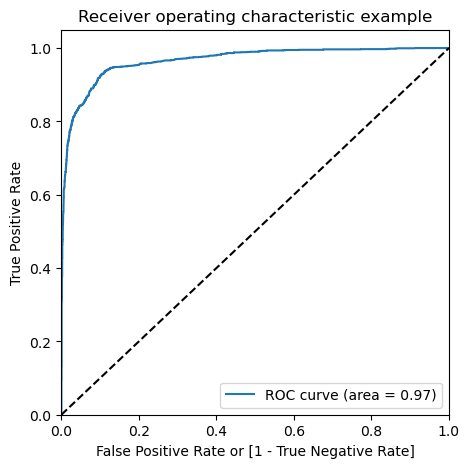

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

##### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.935633,1979,1,1,1,1,1,1,1,1,1,1,1
1,0,0.519975,6249,1,1,1,1,1,1,1,0,0,0,0
2,0,0.113992,5557,0,1,1,0,0,0,0,0,0,0,0
3,0,0.003437,7865,0,1,0,0,0,0,0,0,0,0,0
4,0,0.007735,8491,0,1,0,0,0,0,0,0,0,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.362952  1.000000  0.000000
0.1   0.1  0.810886  0.966212  0.722391
0.2   0.2  0.902324  0.941316  0.880108
0.3   0.3  0.908133  0.920569  0.901047
0.4   0.4  0.910499  0.883225  0.926039
0.5   0.5  0.910284  0.844102  0.947991
0.6   0.6  0.911360  0.809129  0.969605
0.7   0.7  0.903830  0.773563  0.978048
0.8   0.8  0.895439  0.741553  0.983114
0.9   0.9  0.865318  0.644339  0.991219


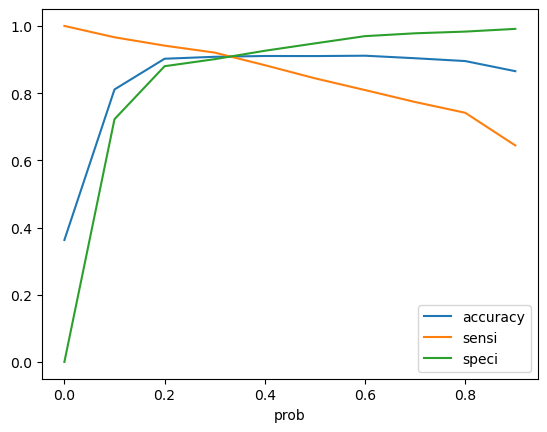

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [142]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.935633,1979,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.519975,6249,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.113992,5557,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.003437,7865,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.007735,8491,0,1,0,0,0,0,0,0,0,0,0,0


In [143]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.935633,1979,1,94
1,0,0.519975,6249,1,52
2,0,0.113992,5557,0,11
3,0,0.003437,7865,0,0
4,0,0.007735,8491,0,1


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9081325301204819

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2668,  293],
       [ 134, 1553]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.920569057498518

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.901046943600135

Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:


Accuracy : 90.81%

Sensitivity : 92.05%

Specificity : 90.10%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [149]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.09895305639986492


In [150]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8412784398699892


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9521770164168452


In [152]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2668,  293],
       [ 134, 1553]], dtype=int64)

In [153]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8412784398699892

In [154]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.920569057498518

In [155]:
from sklearn.metrics import precision_score, recall_score

In [156]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8412784398699892

In [157]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.920569057498518

In [158]:
from sklearn.metrics import precision_recall_curve

In [159]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

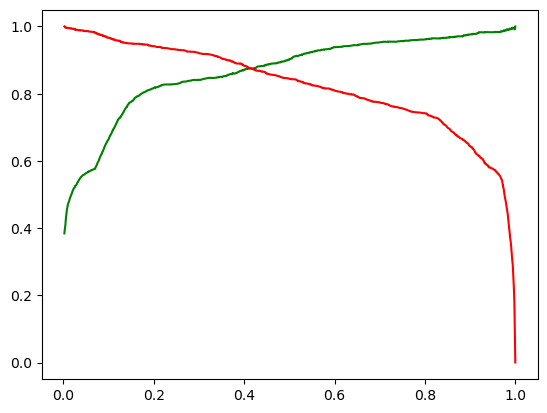

In [160]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [161]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-1.144209,-0.560701,-1.266390,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8280,-0.783851,-0.236439,-0.628396,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6941,-0.783851,-1.021301,-1.266390,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7343,4.621518,0.028867,-0.545456,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3734,-0.063135,-0.582810,0.647593,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-0.560701,0,1,0,0,1,0,0,0,0
8280,-0.236439,0,0,0,0,0,0,0,0,0
6941,-1.021301,0,0,0,0,1,0,0,0,0
7343,0.028867,0,0,0,0,0,0,0,0,1
3734,-0.582810,0,0,0,0,0,0,0,0,0


In [163]:
X_test_sm = sm.add_constant(X_test)

##### PREDICTIONS ON TEST SET

In [164]:
y_test_pred = res.predict(X_test_sm)

In [165]:
y_test_pred[:10]

8970    0.002270
8280    0.174495
6941    0.005435
7343    0.948724
3734    0.125653
7889    0.598194
837     0.005358
8227    0.019962
7245    0.999419
8622    0.913947
dtype: float64

In [166]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
# Let's see the head
y_pred_1.head()

,0
8970,0.002270
8280,0.174495
6941,0.005435
7343,0.948724
3734,0.125653


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8970,0.002270
1,0,8280,0.174495
2,0,6941,0.005435
3,0,7343,0.948724
4,0,3734,0.125653


In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [174]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8970,0.002270
1,0,8280,0.174495
2,0,6941,0.005435
3,0,7343,0.948724
4,0,3734,0.125653


In [175]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [176]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8970,0,0.002270,0
1,8280,0,0.174495,17
2,6941,0,0.005435,1
3,7343,0,0.948724,95
4,3734,0,0.125653,13


In [177]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [178]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8970,0,0.002270,0,0
1,8280,0,0.174495,17,0
2,6941,0,0.005435,1,0
3,7343,0,0.948724,95,1
4,3734,0,0.125653,13,0


In [179]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9091365461847389

In [180]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1140,  118],
       [  63,  671]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9141689373297003

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.9062003179650239

In [184]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8504435994930292

In [185]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9141689373297003

Observation:
    
After running the model on the Test Data these are the figures we obtain:
    

Accuracy : 90.92%
    
Sensitivity : 91.41%
    
Specificity : 90.62%
    
    
Final Observation:
    
Let us compare the values obtained for Train & Test:
    

Train Data:
    
Accuracy : 90.81%

Sensitivity : 92.05%

Specificity : 90.10%
    
Test Data: 
    
Accuracy : 90.92%
    
Sensitivity : 91.41%
    
Specificity : 90.62%
    
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model